# NEHEMMA JUMA - CAPSTONE PROJECT - C24-04 FSDS NA

# CONNECTTEL CUSTOMER CHURN PREDICTION

In [33]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

###Data Understanding


In [34]:
#Loading data into the notebook

data=pd.read_csv("Customer-Churn.csv")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [37]:
#There are 7,043 rows and 21 columns in our dataset

In [38]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [39]:
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [71]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

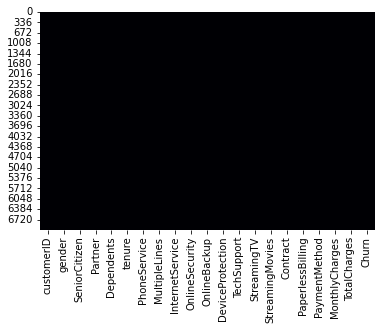

In [41]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [42]:
#Checking the whole data to confirm whether there are null values. From the output, there are no null values that would need replacement
data.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#There are no null values in the data

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


#The dataset has many categorical features


In [44]:
#Total Charges is a feature with numerical values but in string datatype. First, we will convert this column into float.

l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']
    
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [45]:
#There are empty strings present in the above displayed index positions of the TotalCharges column. As these elements were defined as string, they did not appear as Null values and hence the heatmap for missing values did not display anything.

###This created a list with index numbers of the empty strings which are filled with their preceding value and finally the entire column is converted into float using astype function.
We drop the customerID column as well!
Let's divide the features into numerical and categorical features.
We will also execute the label encoding transformation for categorical features.

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


###Creating a deep copy of the orginal dataset and label encoding the text data.
Modifications in the original dataset will not be highlighted in this copy.
Hence, we use this copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.


In [47]:
#Getting the descriptive stats of the data again.

df1.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


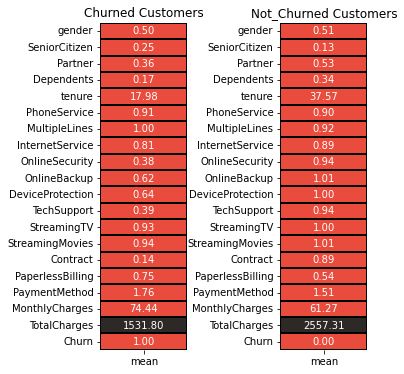

In [48]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

Mean values of all the features for churned and not-churned customers.
Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.

Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on in our analysis.
Churned customer's Contract value is much smaller than those of not-churned customers.

Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.

From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

###Exploratory Data Analysis (EAD)

Dividing features into Numerical and Categorical :

Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

For this dataset, as the number of features are less (3, from the below output), we can manually check the dataset as well.

In [50]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


# Target Variable Visualization (Churn) 

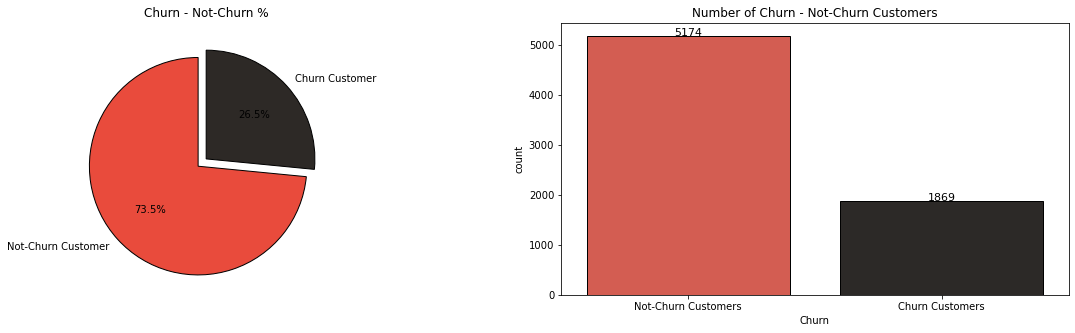

In [51]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers');
plt.show()
    

The dataset is unbalanced.  The ratio is approximately 3 : 1  for Not-Churn : Churn customers.
Due to this, predictions will be biased towards Not-Churn customers since they are the majority.
Visualizations will also be biased for the same reason.

# Categorical Features vs Target Variable (Churn):

For visualization purposes, We will remove Churn, target variable, from the categorical features list.

In [20]:
l1 = ['gender','SeniorCitizen','Partner','Dependents']      # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']     # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod']          # Payment Information

We will divide the categorical features into 3 groups depending on their values or based on the column name.

Group 1 : Customer Information :
        
gender | SeniorCitizen | Partner | Dependents |

AttributeError: 'bool' object has no attribute 'all'

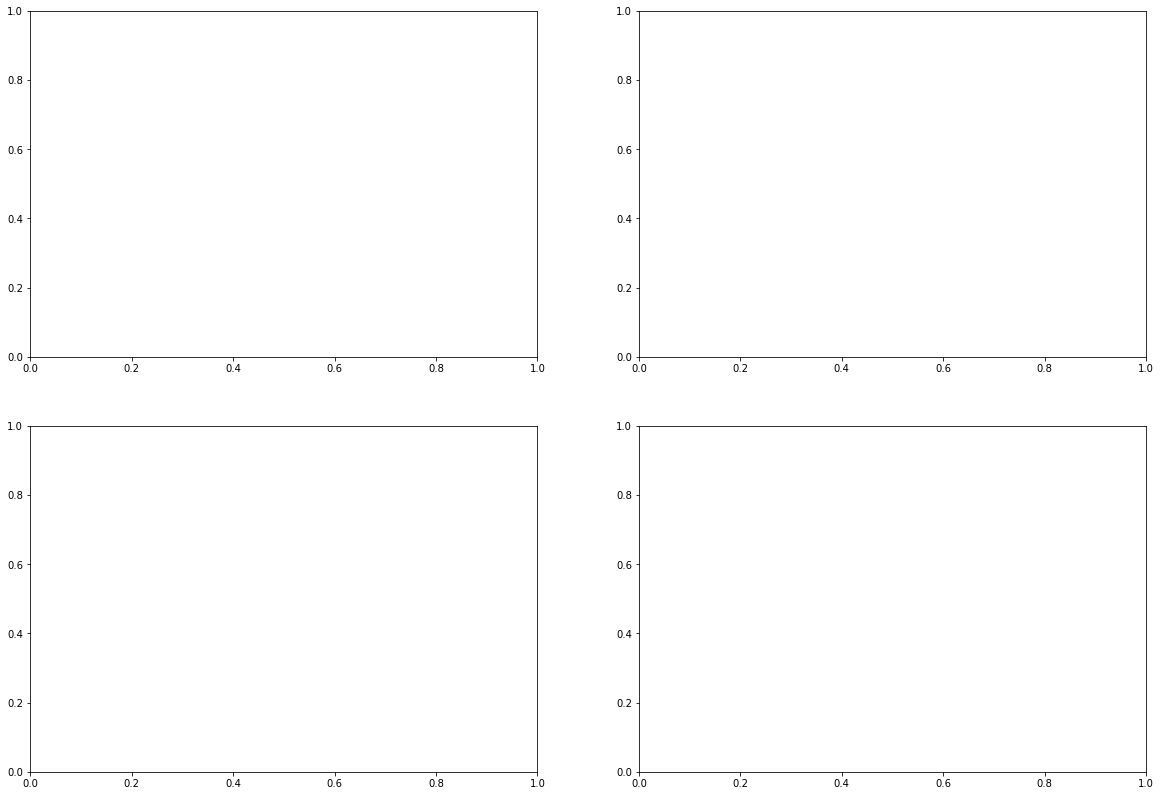

In [72]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

Customer churning for male & female customers is very similar to each other

Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.

Customers who are housing with a Partner churned less as compared to those not living with a Partner.

Similary, churning is high for the customers that don't have Dependents with them




Group 2: Services Subscribed by the Customer :

        For visualization purposes, we will create 2 groups
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies

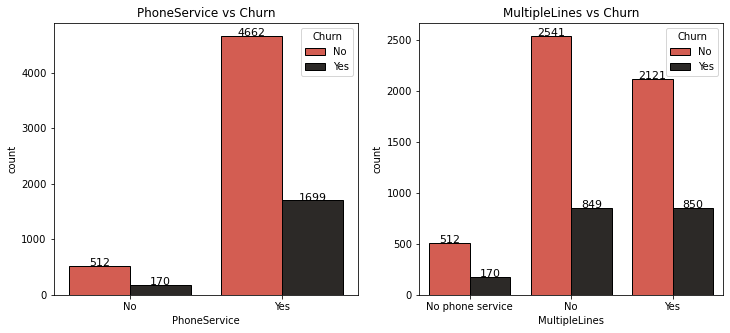

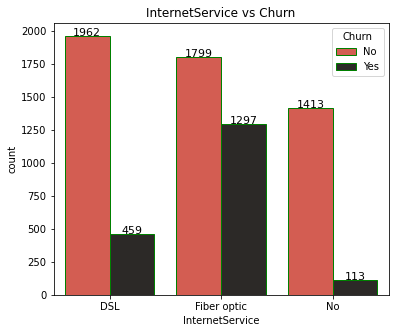

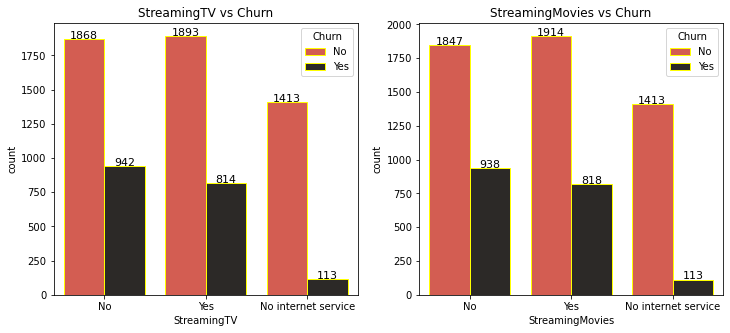

In [22]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))
plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = data,hue = "Churn",palette = colors,edgecolor = 'green')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = data,hue = "Churn",palette = colors,edgecolor = 'yellow')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
        title = l2[i + 3] + ' vs Churn'
    plt.title(title);

For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.

A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. 

On the contrary, from the above graph, customers prefer using DSL for their InternetService.
StreamingTV and StreamingMovies display an identical graph. 

Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault.

Group 2: Services Subscribed by the Customer :
        
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport 

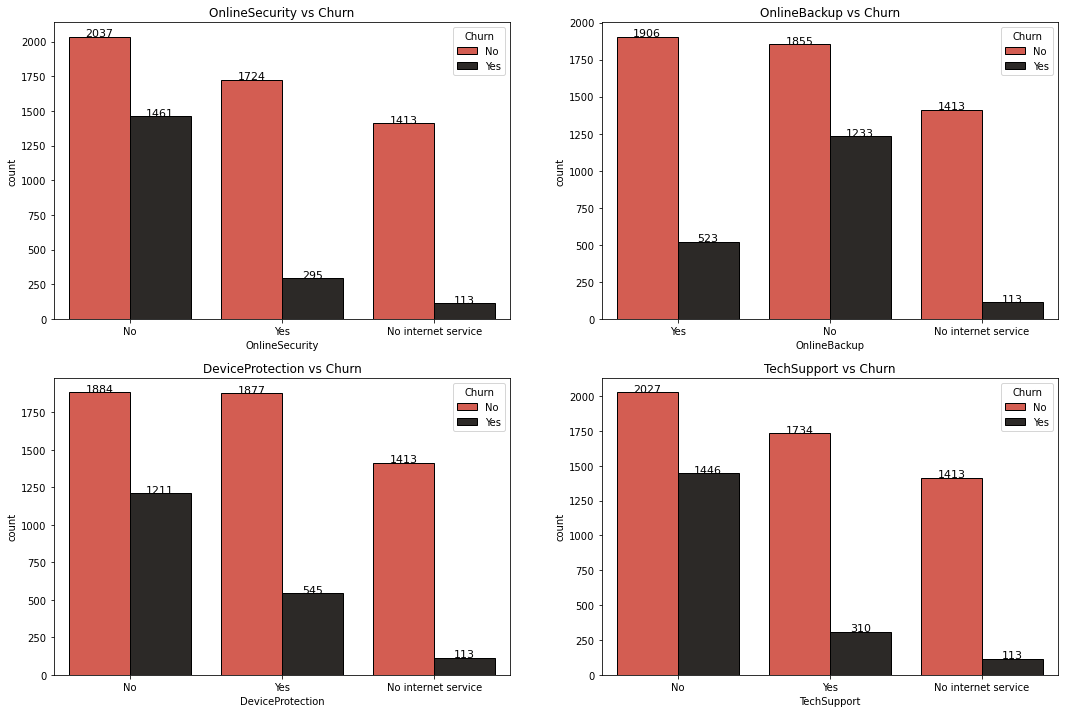

In [23]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (18,12))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

When it comes down to catering the customers, services, OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.




Group 3 : 

Contract | PaperlessBilling | PaymentMethod |

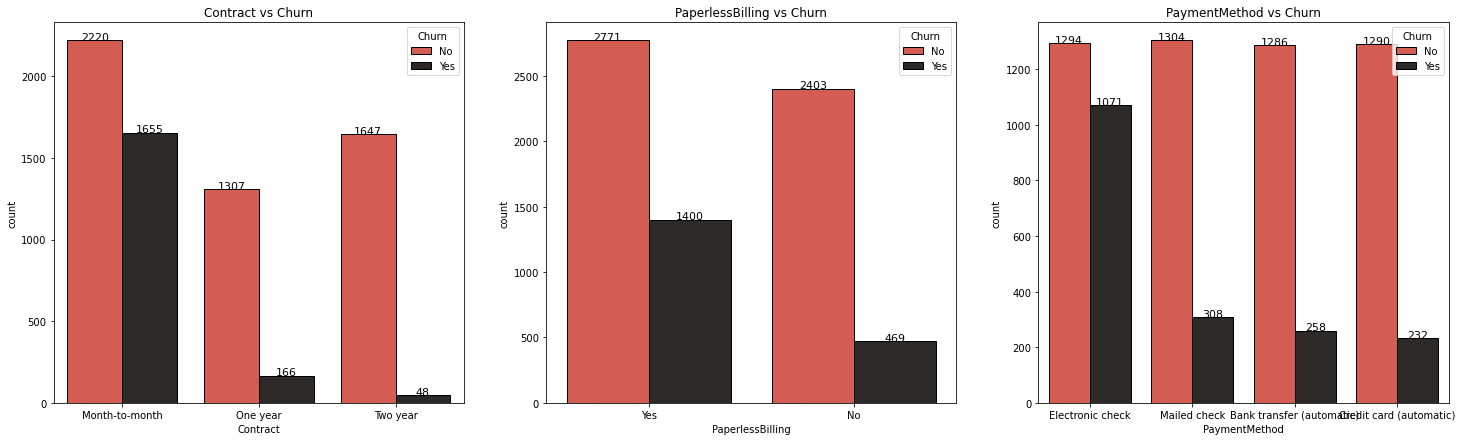

In [24]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(l3[0],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(l3[1],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(l3[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

# Categorical Features vs Positive Target Variable (Churn Cases) :

Group 1 : Customer Information :
        
gender | SeniorCitizen | Partner | Dependents

In [25]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

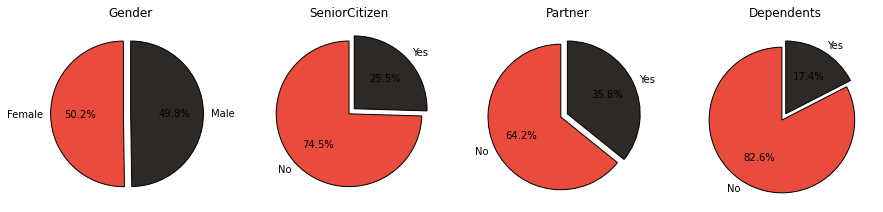

In [26]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!
75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!
Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

Group 2: 

    
Services Subscribed by the Customer :
        
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies 

In [27]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) 
* 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

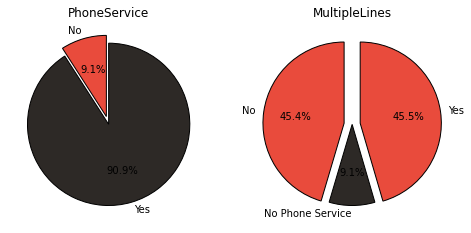

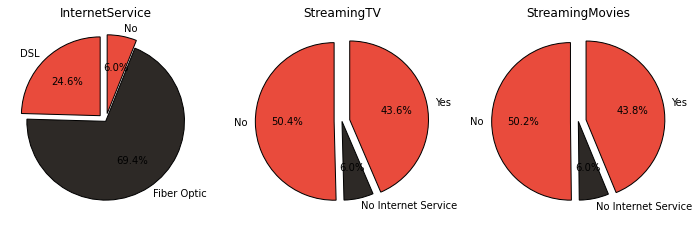

In [28]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

Despite providing PhoneService, a high percentage of customers have switched!
Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!
For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

Group 2: 

Services Subscribed by the Customer :
    
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

In [29]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 
techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

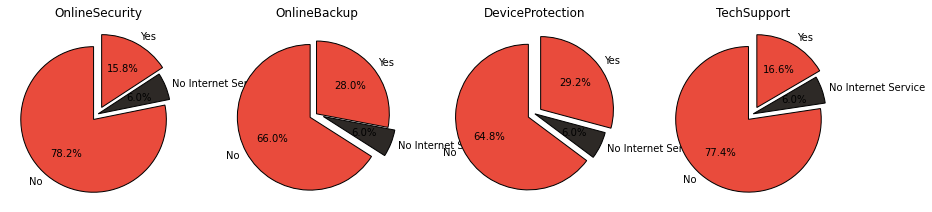

In [30]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',
startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features.

Numerical Features :
    
Distribution of Numerical Features

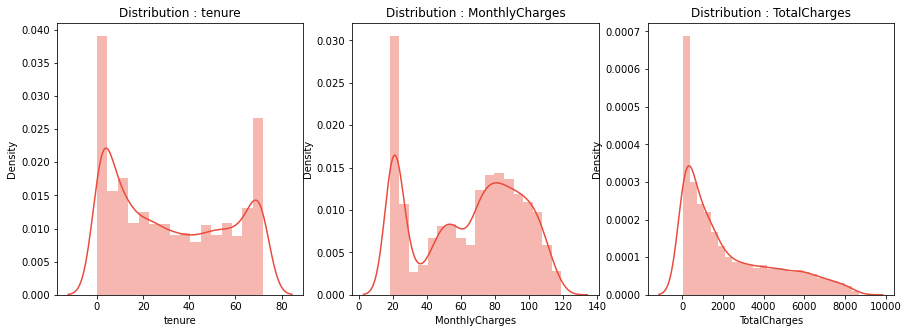

In [31]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
TotalCharges displays a positively or rightly skewed distribution.

# Numerical Features: Target Variable (Outcome)

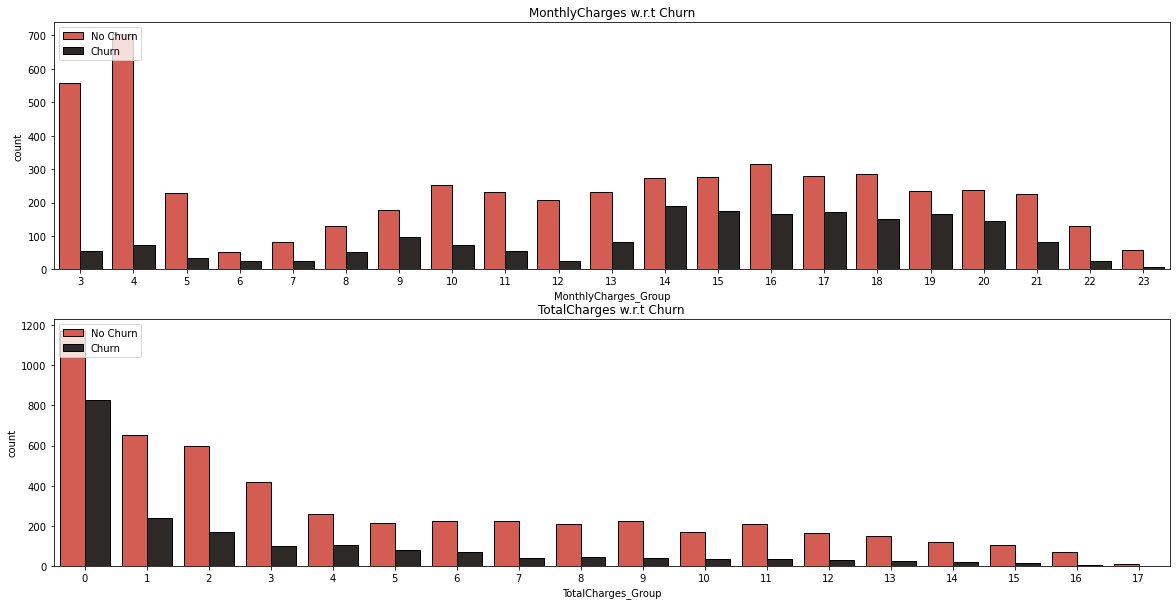

In [32]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(numerical_features[1 + i]+'_Group',data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);

For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). This MonthlyCharges range of values caused the customers to switch.
A very high number of customers opted out of the services for the TotalCharges below 500. This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).

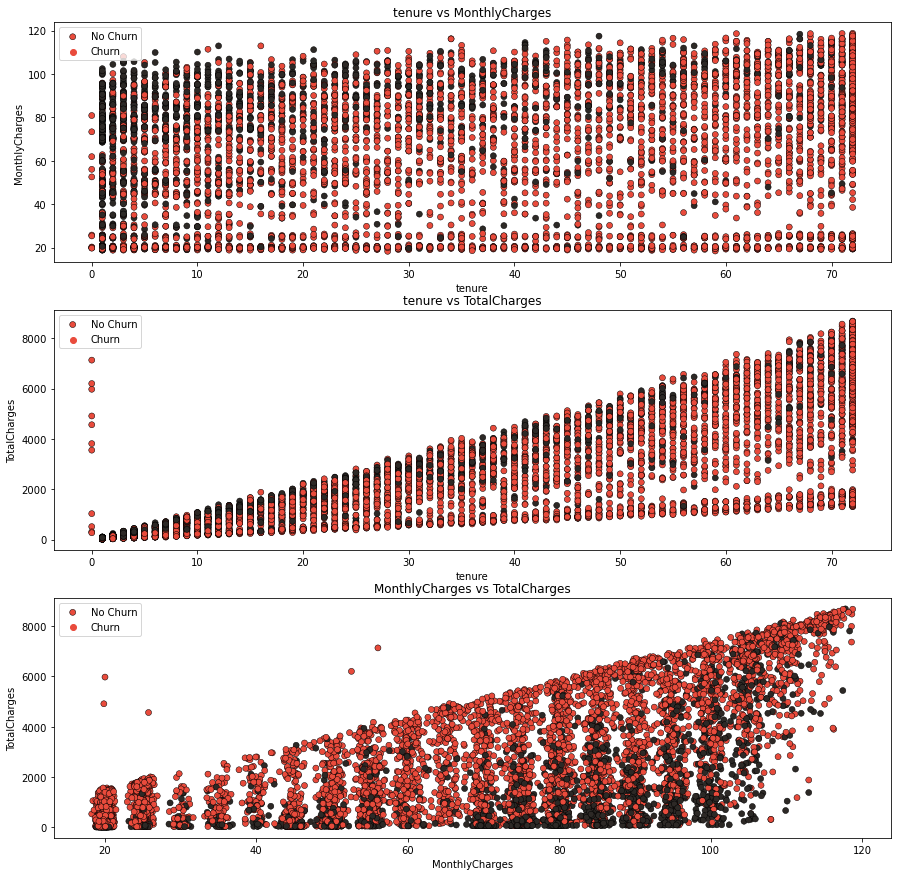

In [64]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.
For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

# Feature Engineering

Data Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization




In [91]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])

Correlation Matrix 

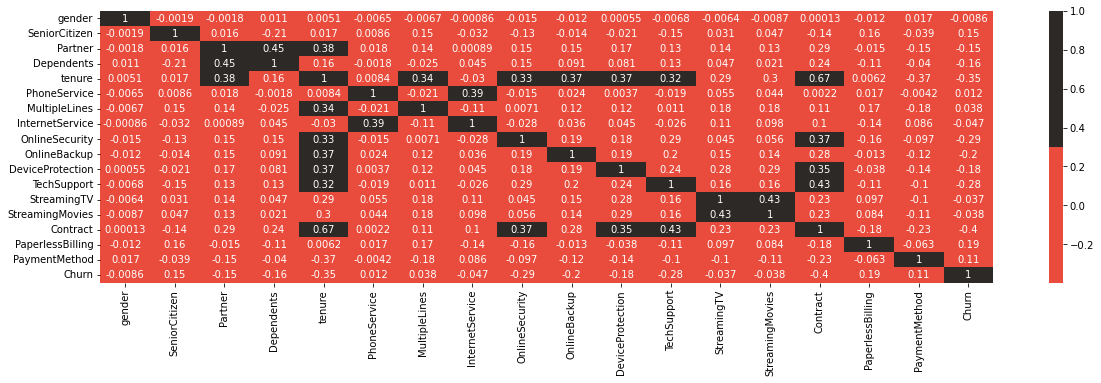

In [74]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

 We will check the correlation only with respect to Churn

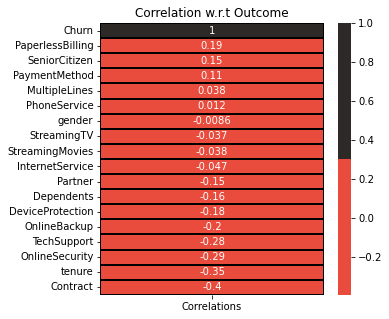

In [75]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService do not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
Remaining features either display a significant positive or negative correlation.

Feature Selection for Categorical Features 

In [128]:
!pip install imbalanced-learn

In [129]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

Chi-Squared Test :

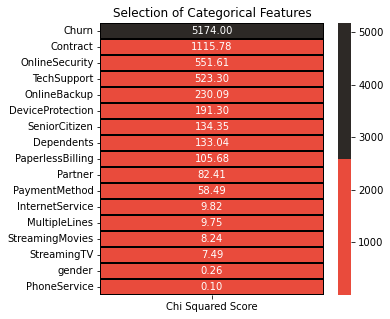

In [77]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

Feature Selection for Numerical Features

In [78]:
from sklearn.feature_selection import f_classif

In [80]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0
2,0,0,0,0.03,2,2,0,0,0,1,3,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0
4,0,0,0,0.03,0,0,0,0,0,1,2,1


# Modeling

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [136]:
X = data.drop('Churn',axis='columns')
y = data['Churn']


In [137]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6705,Male,0,Yes,Yes,0.31,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.33,0.14
5541,Female,0,No,No,0.85,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.88,0.74
504,Male,0,No,Yes,0.96,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),0.61,0.63


In [138]:
y.sample(3)

1313    Yes
5798    Yes
4423     No
Name: Churn, dtype: object

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [140]:
X_train.shape

(5634, 19)

In [141]:
X_test.shape

(1409, 19)

In [151]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])

In [152]:
dummies_payment = pd.get_dummies(data['PaymentMethod'], drop_first= True)
data = pd.concat([data, dummies_payment], axis=1)
data.drop('PaymentMethod',axis =1 , inplace= True)

In [153]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

data['InternetService'] = data['InternetService'].apply(lambda x: internet_ordering.index(x))
data['Contract'] = data['Contract'].apply(lambda x: contract_ordering.index(x))

In [154]:
X = data.drop('Churn', axis= 1)
y = data['Churn']

In [155]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [157]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


In [161]:
!pip install catboost 

In [162]:
from catboost import CatBoostClassifier

In [167]:
!pip install lightgbm 

In [169]:
from lightgbm import LGBMClassifier

In [171]:
from sklearn.naive_bayes import GaussianNB

In [175]:
from sklearn.model_selection import KFold

In [172]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightgbm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}

In [173]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

logistic regression trained
xgboost trained
catboost trained
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
lightgbm trained
gradient boosing trained
naive bayes trained
random forest trained


Evaluation

In [176]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

[LightGBM] [Info] Number of positive: 1348, number of negative: 3722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265878 -> initscore=-1.015639
[LightGBM] [Info] Start training from score -1.015639
[LightGBM] [Info] Number of positive: 1351, number of negative: 3719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266469 -> initscore=-1.012610
[LightGBM]

In [177]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.8454685395508891
----------------
xgboost : 0.8224424134255612
----------------
catboost : 0.8391681060537797
----------------
lightgbm : 0.8367141707082435
----------------
gradient boosing : 0.8455184249038252
----------------
naive bayes : 0.8281286034086556
----------------
random forest : 0.8216322055278782


Logistic regression seems to be the best option. Let us perform some hyperparameter optimization and also check its accuracy on the test set

# Hyperparameter Optimization

In [181]:
!pip install optuna

In [183]:
import optuna

In [184]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(
        solver= 'liblinear',
        penalty = penalty,
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 100)

[I 2024-08-23 20:39:18,601] A new study created in memory with name: no-name-1235797e-01e6-4799-9d44-f5ba72b4ebde
[I 2024-08-23 20:39:19,017] Trial 0 finished with value: 0.8444531245632604 and parameters: {'tol': 7.644014840315298e-07, 'C': 0.08984467573566174, 'max_iter': 180, 'penalty': 'l1'}. Best is trial 0 with value: 0.8444531245632604.
[I 2024-08-23 20:39:19,329] Trial 1 finished with value: 0.8445568276554362 and parameters: {'tol': 6.570474518147793e-06, 'C': 0.06281570577351638, 'max_iter': 165, 'penalty': 'l1'}. Best is trial 1 with value: 0.8445568276554362.
[I 2024-08-23 20:39:19,685] Trial 2 finished with value: 0.8441674612294292 and parameters: {'tol': 5.114063883635854e-07, 'C': 0.056636053564746096, 'max_iter': 165, 'penalty': 'l2'}. Best is trial 1 with value: 0.8445568276554362.
[I 2024-08-23 20:39:19,834] Trial 3 finished with value: 0.8384084633568433 and parameters: {'tol': 0.014943834688156537, 'C': 0.000996081804658744, 'max_iter': 440, 'penalty': 'l2'}. Best 

[I 2024-08-23 20:39:28,521] Trial 35 finished with value: 0.844571413408071 and parameters: {'tol': 4.415403681819926e-05, 'C': 0.0682046696749688, 'max_iter': 250, 'penalty': 'l1'}. Best is trial 31 with value: 0.8445951481947291.
[I 2024-08-23 20:39:28,827] Trial 36 finished with value: 0.8444491208213453 and parameters: {'tol': 1.4307602223506186e-05, 'C': 0.046505859311154474, 'max_iter': 51, 'penalty': 'l1'}. Best is trial 31 with value: 0.8445951481947291.
[I 2024-08-23 20:39:29,056] Trial 37 finished with value: 0.8444531111528246 and parameters: {'tol': 0.0013393191019392054, 'C': 0.0333801232496121, 'max_iter': 327, 'penalty': 'l1'}. Best is trial 31 with value: 0.8445951481947291.
[I 2024-08-23 20:39:29,294] Trial 38 finished with value: 0.8444081628855615 and parameters: {'tol': 0.028766018295781993, 'C': 0.05866376298991236, 'max_iter': 149, 'penalty': 'l1'}. Best is trial 31 with value: 0.8445951481947291.
[I 2024-08-23 20:39:29,562] Trial 39 finished with value: 0.8445545

[I 2024-08-23 20:39:39,879] Trial 71 finished with value: 0.8445599531047501 and parameters: {'tol': 1.5238899111174533e-06, 'C': 0.06773102541020125, 'max_iter': 61, 'penalty': 'l1'}. Best is trial 53 with value: 0.8445964814912731.
[I 2024-08-23 20:39:40,180] Trial 72 finished with value: 0.8445907916608529 and parameters: {'tol': 4.340128396231463e-06, 'C': 0.0651634995533024, 'max_iter': 75, 'penalty': 'l1'}. Best is trial 53 with value: 0.8445964814912731.
[I 2024-08-23 20:39:40,495] Trial 73 finished with value: 0.8445841913838921 and parameters: {'tol': 4.855530505047734e-06, 'C': 0.05762645570648108, 'max_iter': 110, 'penalty': 'l1'}. Best is trial 53 with value: 0.8445964814912731.
[I 2024-08-23 20:39:40,827] Trial 74 finished with value: 0.8445800427365888 and parameters: {'tol': 8.04466567572573e-06, 'C': 0.06369456694646171, 'max_iter': 80, 'penalty': 'l1'}. Best is trial 53 with value: 0.8445964814912731.
[I 2024-08-23 20:39:41,113] Trial 75 finished with value: 0.84450627

In [185]:
study.best_params

{'tol': 1.0405654689703873e-06,
 'C': 0.05507341088815955,
 'max_iter': 203,
 'penalty': 'l1'}

In [186]:
lr = LogisticRegression(
    solver = 'liblinear',
    tol = 0.008408625396645686,
    C = 0.08440490508701622,
    max_iter = 434,
    penalty = 'l1')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [187]:
print("Actual values    :", y_test.values[:20])
print("Predicted values :", y_pred[:20])

Actual values    : [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
Predicted values : [0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [188]:
predictions = pd.DataFrame({'Probability of Customer Churning': y_pred_prob, 'Probability of customer not churning' : 1 - y_pred_prob})
predictions.head()

,Probability of Customer Churning,Probability of customer not churning
0,0.03,0.97
1,0.69,0.31
2,0.08,0.92
3,0.40,0.60
4,0.03,0.97


In [189]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred_prob), 3))

ROC AUC Score: 0.84


We have a ROC score of 0.85, similar to what we got earlier

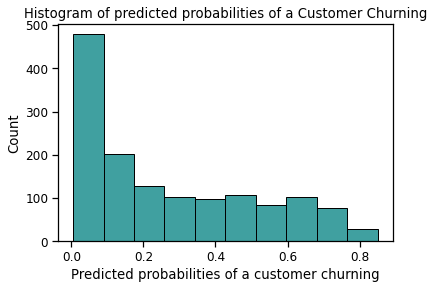

In [190]:
sns.set_context('notebook', font_scale= 1.1)
sns.histplot(y_pred_prob, bins= 10, color= 'teal')
plt.title('Histogram of predicted probabilities of a Customer Churning')
plt.xlabel('Predicted probabilities of a customer churning')
plt.show()

In [194]:
import scikitplot as skplt

In [197]:
from sklearn.metrics import roc_curve

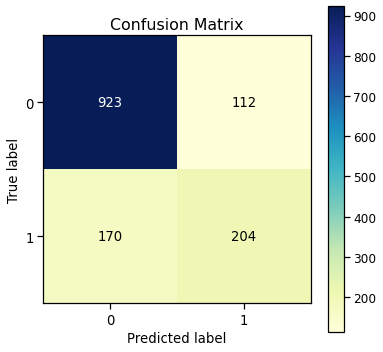

In [195]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');

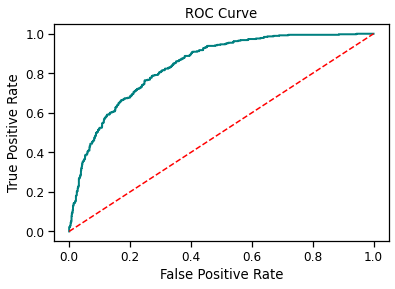

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# ANN 

In [208]:
X_train.shape

(5634, 21)

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [211]:
model = tf.keras.Sequential([
    tf.keras.Input(21),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
     metrics=[tf.keras.metrics.AUC(name='auc')]
)


BATCH_SIZE = 100
EPOCHS = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = early_stopping
)
BATCH_SIZE = 100
EPOCHS = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = early_stopping
)

ValueError: Cannot convert '21' to a shape.

In [215]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Define the number of epochs
EPOCHS = 10

Validation loss isn't changing that much after 6th epoch and our model has probably started overfitting after that

In [217]:
model.evaluate(X_test, y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'

# Measures for Reducing Customer Churn & Revenue Increase

3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!

The number of SeniorCitizen customers are low but their lowerlimit of MonthlyCharges is higher than the other customers. Thus, SeniorCitizen customers are ready to pay top dollar but they need to catered with that level of service. For customers with a Partner as well as customers living alone, they prefer services with MonthlyCharges below 65.

Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. They must lower the churn tenure of 40 - 50 months for these services!.

Once they build a solid pipeline of support services for customers, they need to push the usage of MultipleLines & Fiber Optic cables for the PhoneService & InternetService respectively. But the major hurdle for these 2 services is the starting point of 75+ in MonthlyCharges.

Thus, they need to create combinations of options provided for PhoneService & InternetService where average of these MonthlyCharges will be in the range of 100 - 120 :

No MultipleLines + OpticFiber
MultipleLines + DSL
This will increase the mean income from a user as it completely drops the option of choosing a combination of No MultipleLines + DSL whose mean MonthlyCharges is probably 60 - 70!
StreamingTV and StreamingMovies need to be made affordable as well as reducing it's churn tenure. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.
It needs to put an end to the Electronic check for payment purposes due to it's high churn and focus entirely on Bank Transfer (automatic) & Credit Card (automatic)! However, they will be challenged to reduce the median churn tenure of above 20 months for these 2 PaymentMethod which is double the churn tenure of Electronic check.
Lower limit of Electronic check is around 60 whereas that of Bank Transfer (automatic) & Credit Card (automatic) is around 20 in MonthlyCharges. PaperlessBilling is another expensive feature with a starting point of 60 whereas the other options are cheap starting at 20 in MonthlyCharges.

Once the MonthlyCharges for any single service hits the 70 mark, customers become very conscious about their MonthlyCharges. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process

# Conclusion

Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop fo improvement.

On model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detecti could also bump up the F1 Score (Churn) & Cross Vaonlidation Score. Stack of models pipped the XGBClassifier & LGBMClassifier by a margin of 0.01 for F1 Score (Churn).